In [7]:
# Import necessary libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load an image from file
image = cv2.imread("FCB.jpg")

# Check if the image is loaded correctly
if image is None:
    print("Error: Could not load the image.")
else:
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Define kernel size and sigma values for Gaussian blur
    kernel_size_x, kernel_size_y = 5, 5  
    sigma_x = 1 

    # Apply Gaussian blur to reduce noise
    blurred_image = cv2.GaussianBlur(gray_image, (kernel_size_x, kernel_size_y), sigma_x)

    # Define thresholds for the Canny algorithm
    threshold1 = 100  # Lower threshold
    threshold2 = 200  # Upper threshold

    # Perform edge detection using the Canny algorithm
    edges = cv2.Canny(blurred_image, threshold1, threshold2)

    # Display the original and edge-detected images
    cv2.imshow("Original Image", image)
    cv2.imshow("Edge-detected Image", edges)

    # Wait for a key press to close the windows
    cv2.waitKey(0)

    # Close OpenCV windows
    cv2.destroyAllWindows()


# HOG

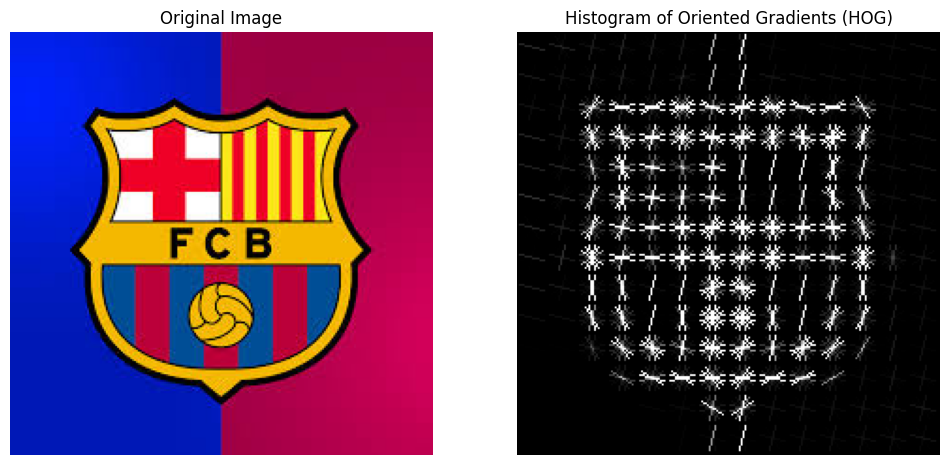

In [4]:
# Import necessary libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.feature import hog
from skimage import exposure

# Load an image from file
image_path = "FCB.jpg"  # Replace with the actual path to your image
image = cv2.imread(image_path)

# Check if the image is loaded correctly
if image is None:
    print(f"Error: Could not load the image from {image_path}.")
else:
    # Convert the image from BGR to RGB
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Apply HOG (Histogram of Oriented Gradients)
    features, img_hog = hog(
        img_rgb,
        orientations=8,
        pixels_per_cell=(16, 16),  # Adjusted cell size for typical HOG
        cells_per_block=(1, 1),
        visualize=True,
        channel_axis=-1,  # Use channel_axis instead of multichannel
    )

    # Rescale the HOG image intensity for better visualization
    rescale_intensity = exposure.rescale_intensity(img_hog, in_range=(0, 10))

    # Display the original image and HOG features
    fig, (a1, a2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

    a1.axis("off")
    a1.imshow(img_rgb)
    a1.set_title("Original Image")

    a2.axis("off")
    a2.imshow(rescale_intensity, cmap="gray")
    a2.set_title("Histogram of Oriented Gradients (HOG)")

    plt.show()
